## 3. Analyze the peakTree output

As a final step, let's have a look how to analyze an interpret a time-height slice of multipeak data.

The observations for the case study were taken at Punta Arenas between 2019-08-22_07:35 and 09:30 UTC with a vertically looking Metek MIRA-35.


#### Resources
- [pyLARDA](https://github.com/lacros-tropos/larda)
- [pyLARDA documentation](https://lacros-tropos.github.io/larda-doc/html/index.html)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import os
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

# pyLARDA provides functions for data loading, file joining, analysis and plotting
# https://github.com/lacros-tropos/larda
import pyLARDA
import pyLARDA.peakTree as pLpT
import pyLARDA.helpers as h
import pyLARDA.Transformations as Transf

In [3]:
%matplotlib inline

In [4]:
larda = pyLARDA.LARDA('filepath').connect(c_info={'altitude': 12})

paths = [
    '../output/20190822_0700_Pun_peakTree_nmra.nc4',
    '../output/20190822_0800_Pun_peakTree_nmra.nc4',
    '../output/20190822_0900_Pun_peakTree_nmra.nc4',
]

# either specify a time interval 
time_int = [datetime.datetime(2019,8,22,7,35),
            datetime.datetime(2019,8,22,9,30)]
# or if given empty the whole period in the files will be plotted
# time_int = []

trees = larda.read("peakTree", "tree", time_int, [0, 7000],paths=paths)

savepath = 'plots/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

>> LARDA initialized. Documentation available at https://lacros-tropos.github.io/larda-doc/
campaign list: 
/mnt/c/Users/radenz/dev/peakTree-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


[slice(250, None, None)]
(191, 221, 15, 11)
[slice(0, None, None)]
(443, 221, 15, 11)
[slice(0, 249, None)]
(249, 221, 15, 11)


In [5]:
print('type(trees): ', type(trees))

print('trees.keys() ', trees.keys())

type(trees):  <class 'dict'>
trees.keys()  dict_keys(['dimlabel', 'joints', 'filename', 'paraminfo', 'rg_unit', 'colormap', 'var_unit', 'var_lims', 'system', 'name', 'rg', 'ts', 'var', 'mask'])


In [6]:
trees['var'][100,30]

{0: {'thres': -62.254215240478516,
  'width': 0.21362712979316711,
  'z': -13.032567024230957,
  'bounds': [290, 331],
  'skew': 0.1844947338104248,
  'prominence': 37.49762725830078,
  'v': -0.8409669399261475,
  'id': 0,
  'ldr': -27.039772033691406,
  'ldrmax': -27.109516143798828,
  'coords': [0]},
 1: {'parent_id': 0.0,
  'thres': -56.257755279541016,
  'width': 0.03285245969891548,
  'z': -50.0818977355957,
  'bounds': [290, 294],
  'skew': 0.032848842442035675,
  'prominence': 0.7310523986816406,
  'v': -1.6089084148406982,
  'id': 1,
  'ldr': -60.0,
  'ldrmax': -10.921878814697266,
  'coords': [0, 0]},
 2: {'parent_id': 0.0,
  'thres': -56.257755279541016,
  'width': 0.21333461999893188,
  'z': -13.033217430114746,
  'bounds': [294, 331],
  'skew': 0.18957261741161346,
  'prominence': 31.50116539001465,
  'v': -0.840893030166626,
  'id': 2,
  'ldr': -27.039772033691406,
  'ldrmax': -27.109516143798828,
  'coords': [0, 1]}}

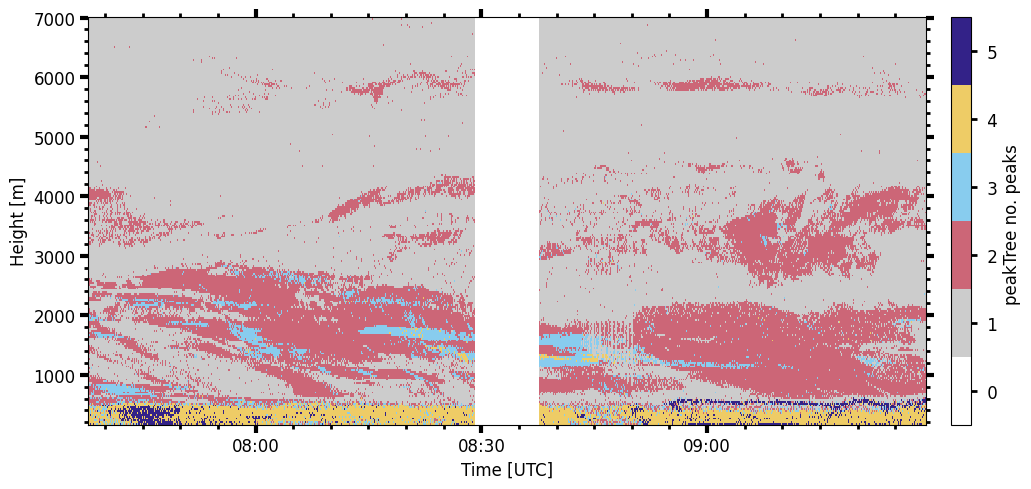

In [7]:
# the tree_to_timeheight selects a 2d array from the ['time', 'range', 'dict'] tree data container
# here just the total number of nodes is returned
# (see https://lacros-tropos.github.io/larda-doc/html/peakTree.html#pyLARDA.peakTree.tree_to_timeheight)
no_nodes = pLpT.tree_to_timeheight(trees, 'no_nodes')
no_nodes['name'] = 'no. nodes'
no_nodes['var_unit'] = ''
fig, ax = pLpT.plot_no_nodes(no_nodes, figsize=[11, 5], no_peaks=True)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=30))
# ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=30))
# ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# fig.savefig(savepath + "{}_no_nodes.png".format(time_int[0].strftime("%Y%m%d-%H%M")), dpi=250)

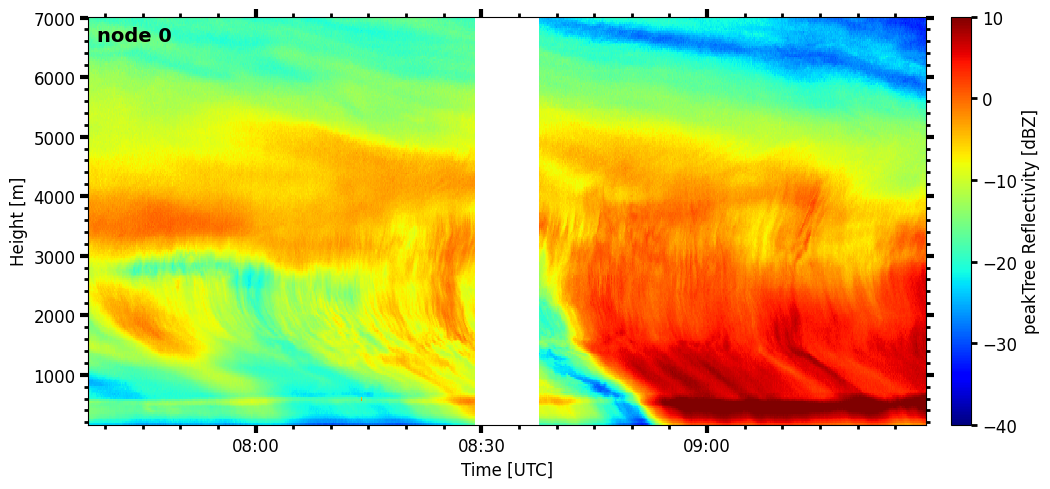

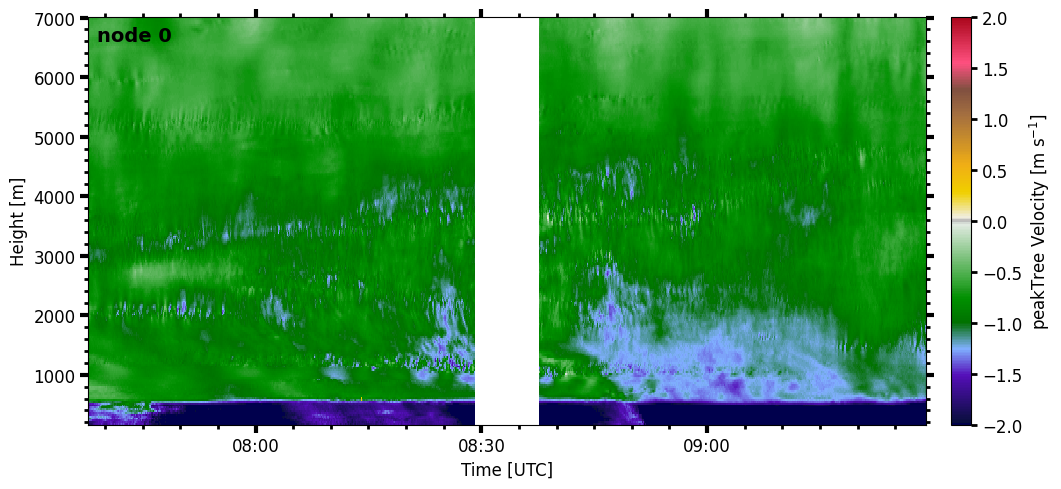

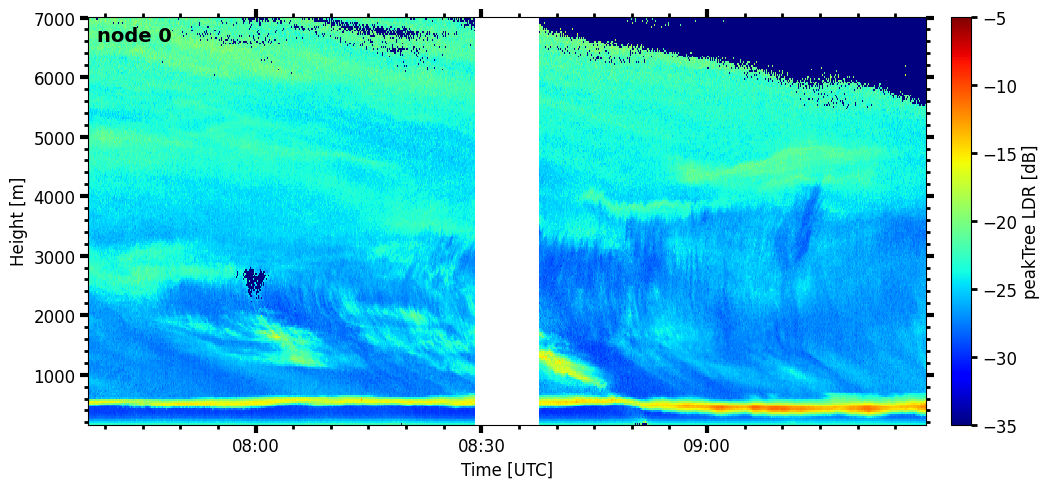

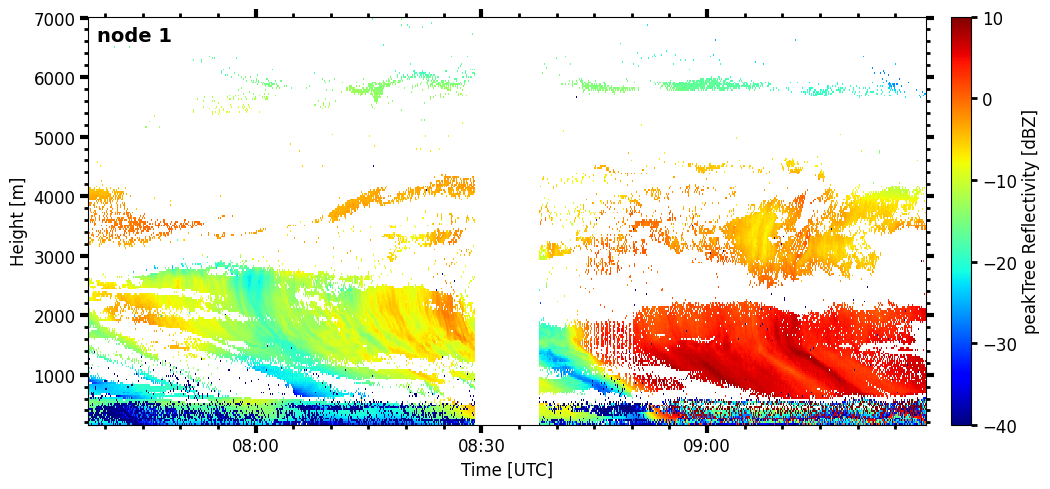

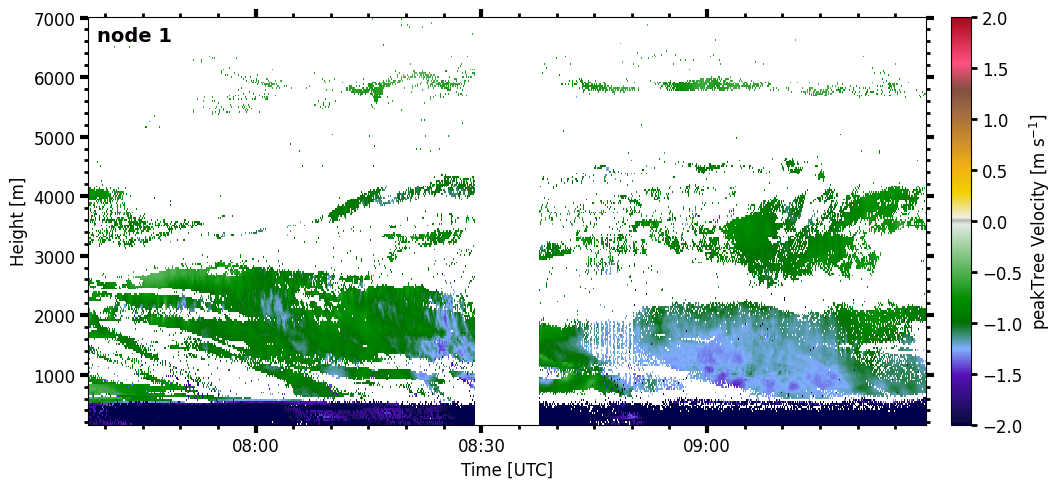

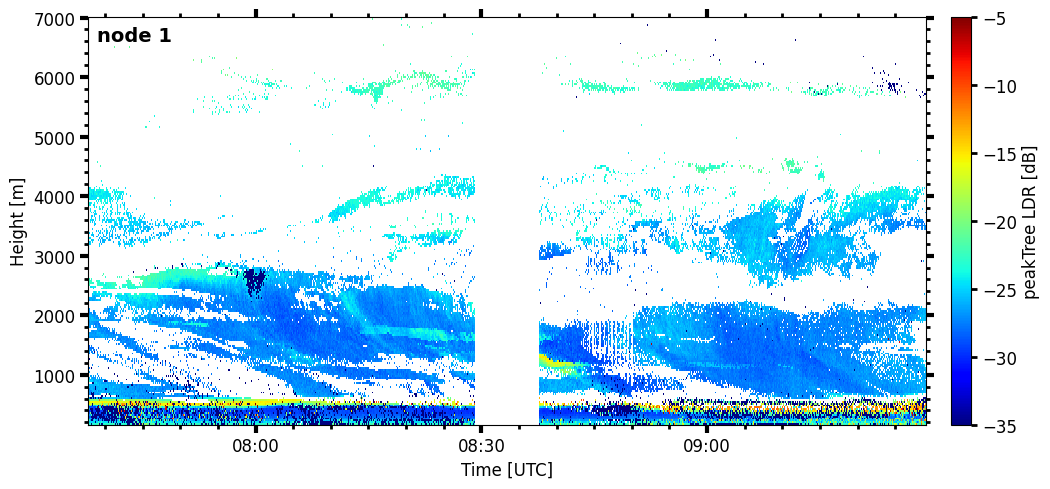

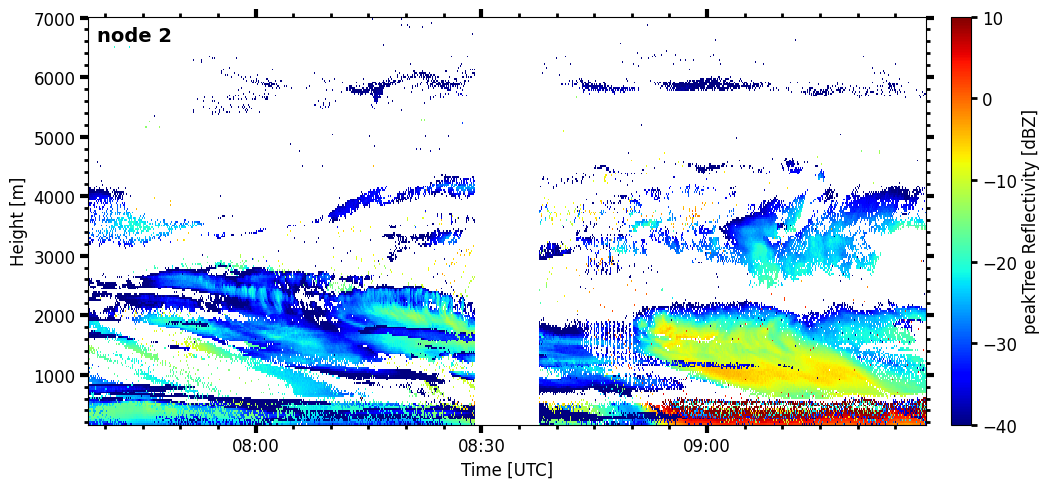

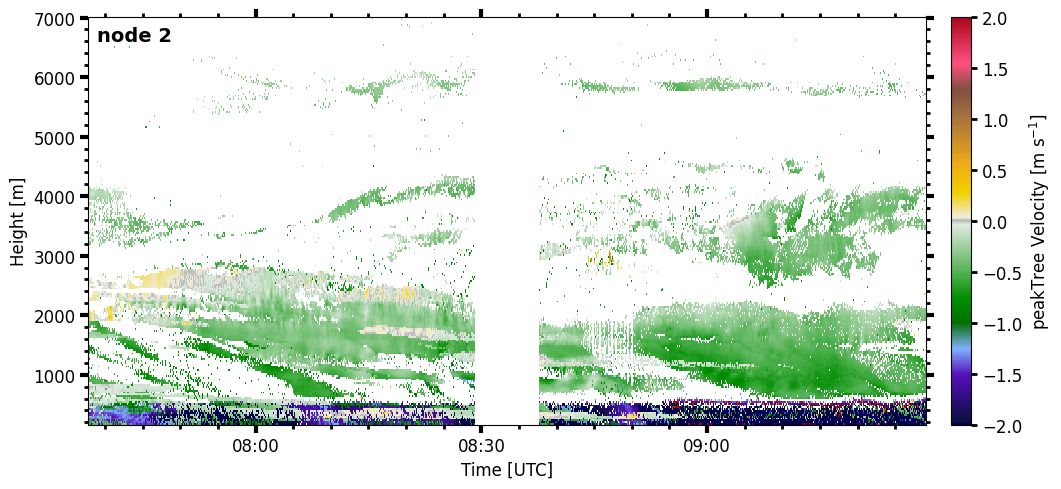

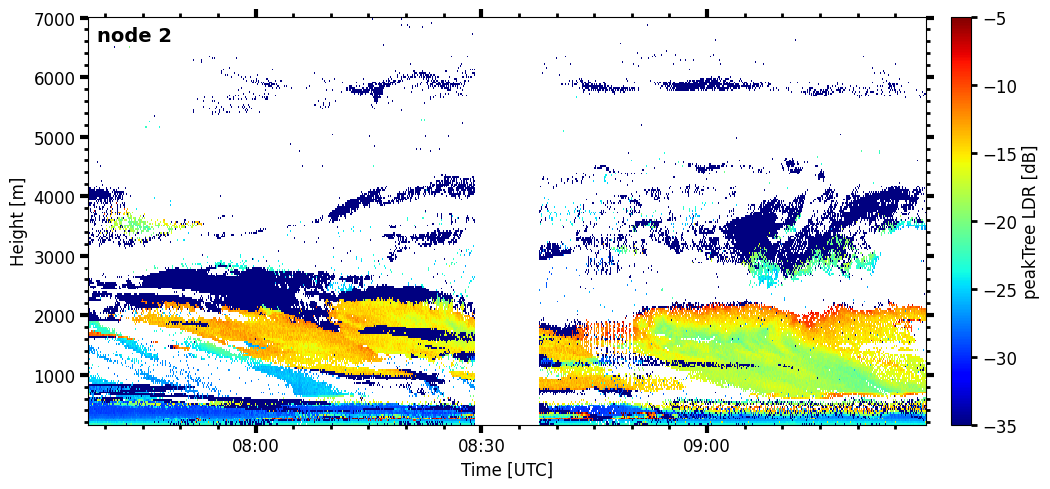

In [8]:
for i in range(3):
    # do the same selection as above, but for the reflectivity of node i
    z = pLpT.tree_to_timeheight(trees, 'z', sel_node=i)
    z['name'] = 'Reflectivity'
    z['var_unit'] = 'dBZ'
    z['var_lims'] = [-40, 10]
    fig, ax = Transf.plot_timeheight2(z, figsize=[11, 5])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.text(0.01,0.94, f"node {i}", transform=ax.transAxes, fontweight='semibold', fontsize=14)
    fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_reflectivity_node{i}.png", dpi=250)    

    v = pLpT.tree_to_timeheight(trees, 'v', sel_node=i)
    v['name'] = 'Velocity'
    v['var_unit'] = 'm s$^\mathrm{-1}$'
    v['var_lims'] = [-2, 2]
    v['colormap'] = 'carbonne'
    fig, ax = Transf.plot_timeheight2(v, figsize=[11, 5])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.text(0.01,0.94, f"node {i}", transform=ax.transAxes, fontweight='semibold', fontsize=14)
    fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_velocity_node{i}.png", dpi=250)    
    
    ldr = pLpT.tree_to_timeheight(trees, 'ldr', sel_node=i)
    ldr['name'] = 'LDR'
    ldr['var_unit'] = 'dB'
    ldr['var_lims'] = [-35, -5]
    fig, ax = Transf.plot_timeheight2(ldr, figsize=[11, 5])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.text(0.01,0.94, f"node {i}", transform=ax.transAxes, fontweight='semibold', fontsize=14)
    fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_ldr_node{i}.png", dpi=250)    
    

[ 6  2  2 -1 -1  2  2 -1 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1
 -1 -1 -1 -1 -1 -1 -1  6  2  2  2  2 -1 -1 -1  2  2  2  2  2  2  2  2  2
  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


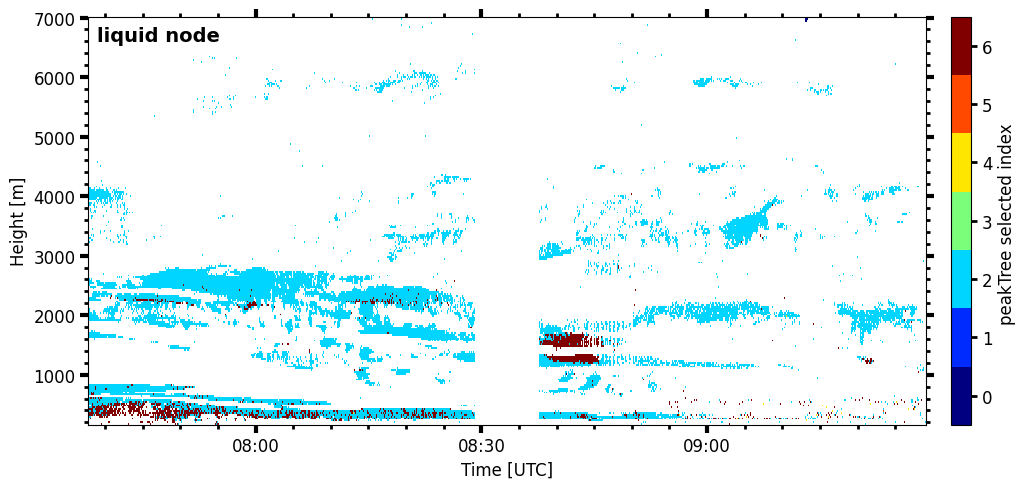

In [9]:
# now we will start to select nodes with special selection rules
# a rather simple one is to identify nodes that are likely liquid
# based on the moments of each node
# (see https://lacros-tropos.github.io/larda-doc/html/_modules/pyLARDA/peakTree.html#select_liquid_node)

index_liquid = pLpT.select_liquid_node(trees)

print(index_liquid['var'][100,10:])

# see https://lacros-tropos.github.io/larda-doc/html/peakTree.html#pyLARDA.peakTree.plot_sel_index
fig, ax = pLpT.plot_sel_index(index_liquid, figsize=[11, 5])
ax.text(0.01,0.94, f"liquid node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_selected_liq_node.png", dpi=250) 



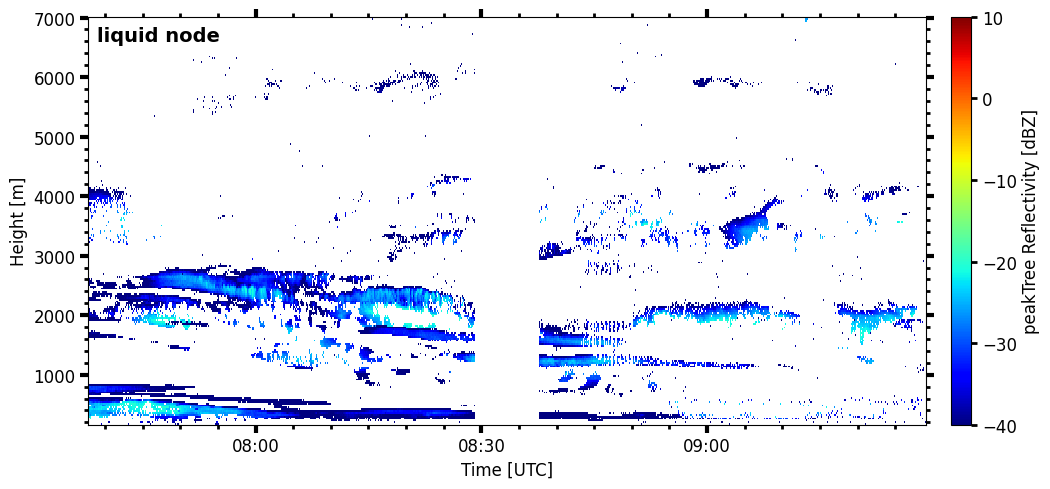

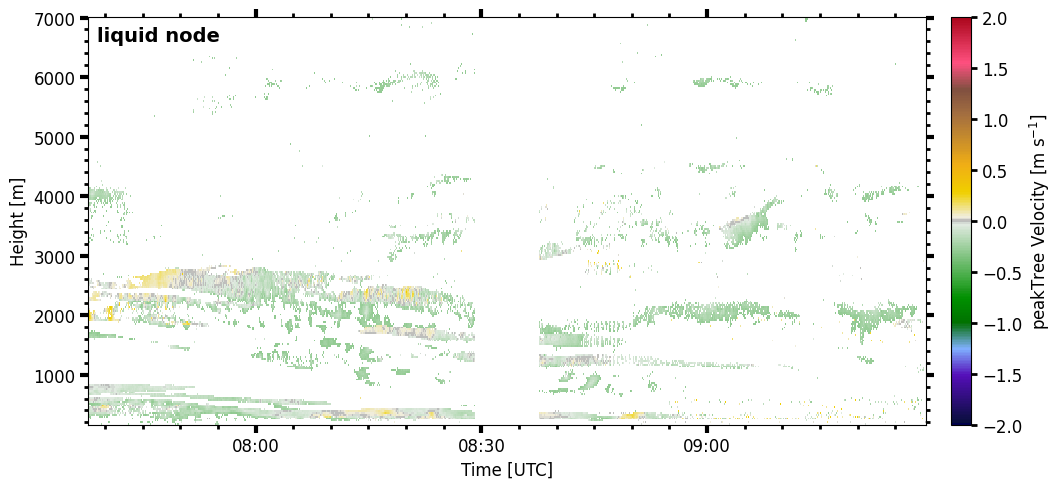

In [10]:
z_liquid = pLpT.tree_to_timeheight(trees, 'z', sel_node=index_liquid['var'])
z_liquid['name'] = 'Reflectivity'
z_liquid['var_unit'] = 'dBZ'
z_liquid['var_lims'] = [-40, 10]
fig, ax = Transf.plot_timeheight2(z_liquid, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"liquid node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_reflectivity_liq_node.png", dpi=250)    


v_liquid = pLpT.tree_to_timeheight(trees, 'v', sel_node=index_liquid['var'])
v_liquid['name'] = 'Velocity'
v_liquid['var_unit'] = 'm s$^\mathrm{-1}$'
v_liquid['var_lims'] = [-2, 2]
v_liquid['colormap'] = 'carbonne'
fig, ax = Transf.plot_timeheight2(v_liquid, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"liquid node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_velocity_liq_node.png", dpi=250)    


### Reminder binary tree structure

<br />
<div>
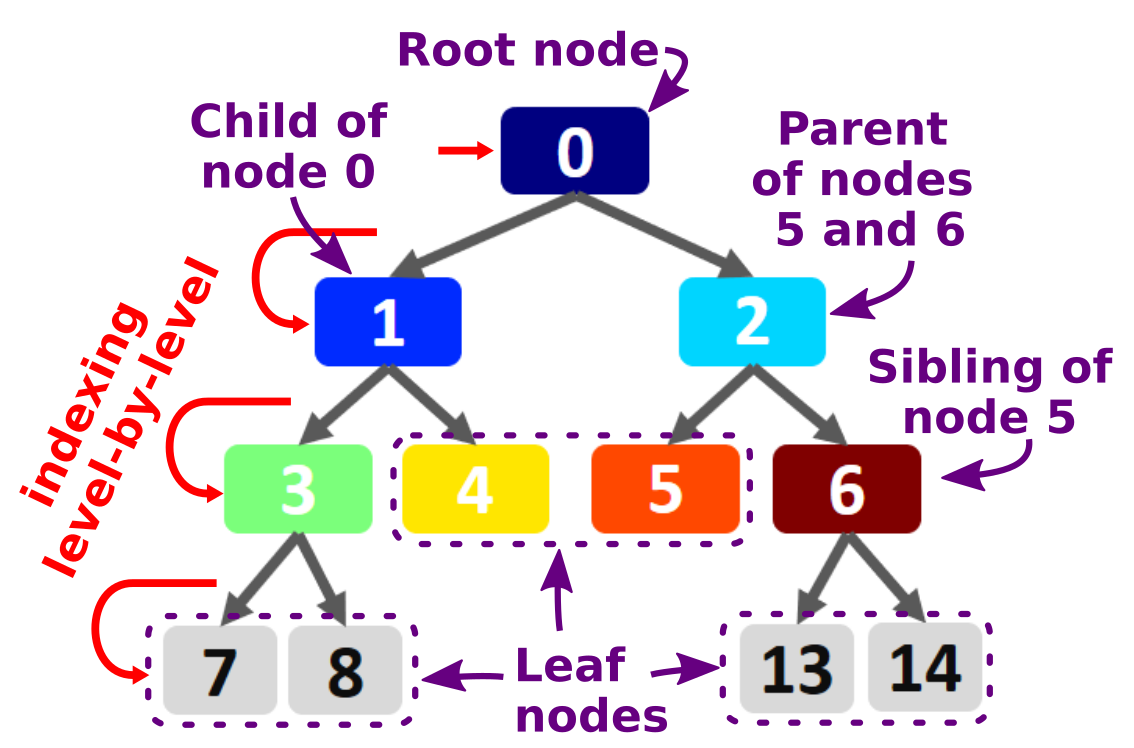
</div>

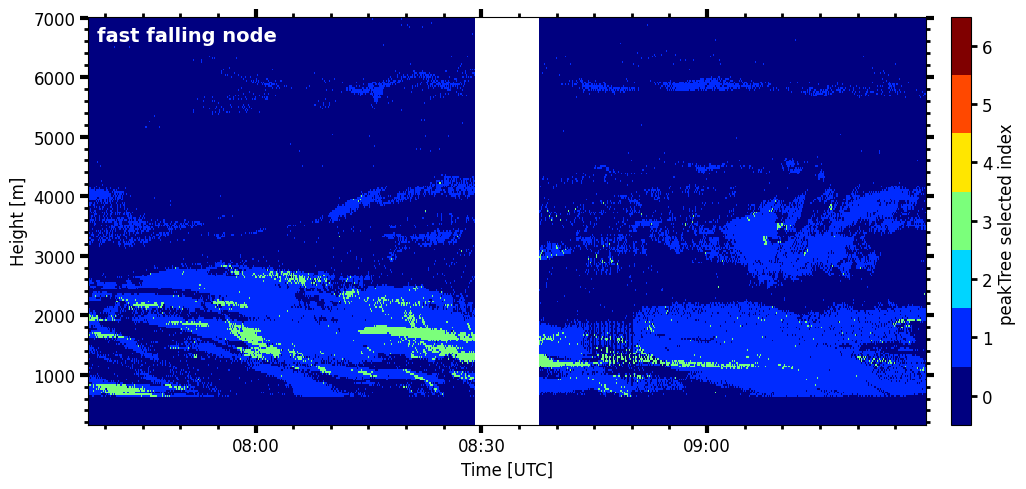

In [11]:
sel_mask = np.zeros_like(no_nodes['var'])
# simple selection rule for the fast falling ice population
sel_mask[(no_nodes['var'] > 1) & (no_nodes['var'] < 4)] = 1

# optional: where node 3 exists, use node 4
sel_mask[~pLpT.tree_to_timeheight(trees, 'z', sel_node=3)['mask']] = 3
# also optional: fallback to node 0 below the melting layer
sel_mask[:,:np.where(no_nodes['rg'] > 600)[0][0]] = 0

index_fast = {**index_liquid}
index_fast['var'] = sel_mask
fig, ax = pLpT.plot_sel_index(index_fast, figsize=[11, 5])
ax.text(0.01,0.94, f"fast falling node", transform=ax.transAxes, fontweight='semibold', color='white', fontsize=14)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_selected_fast_falling.png", dpi=250) 


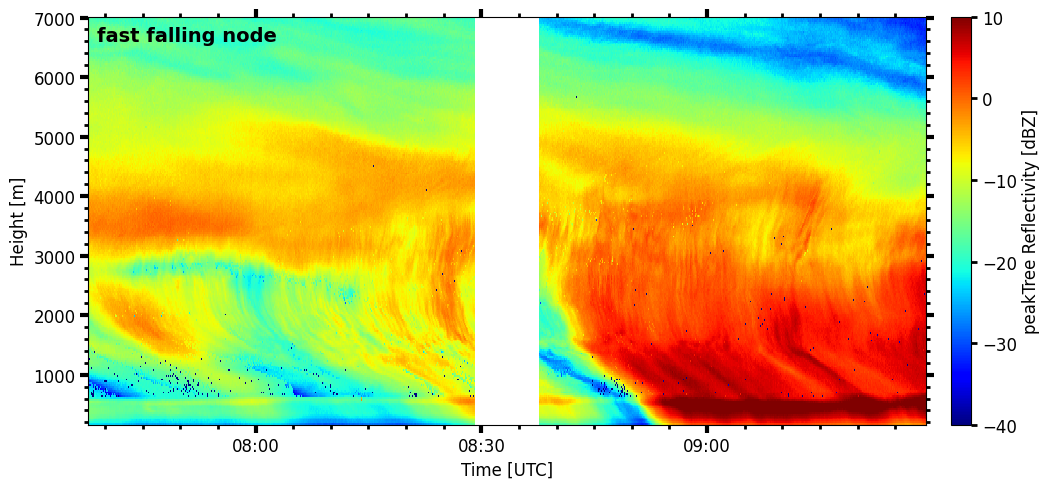

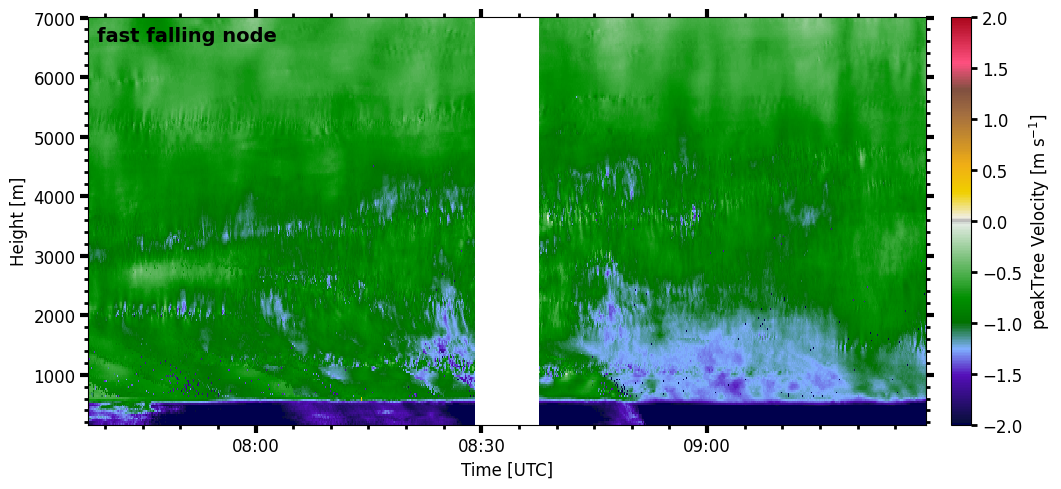

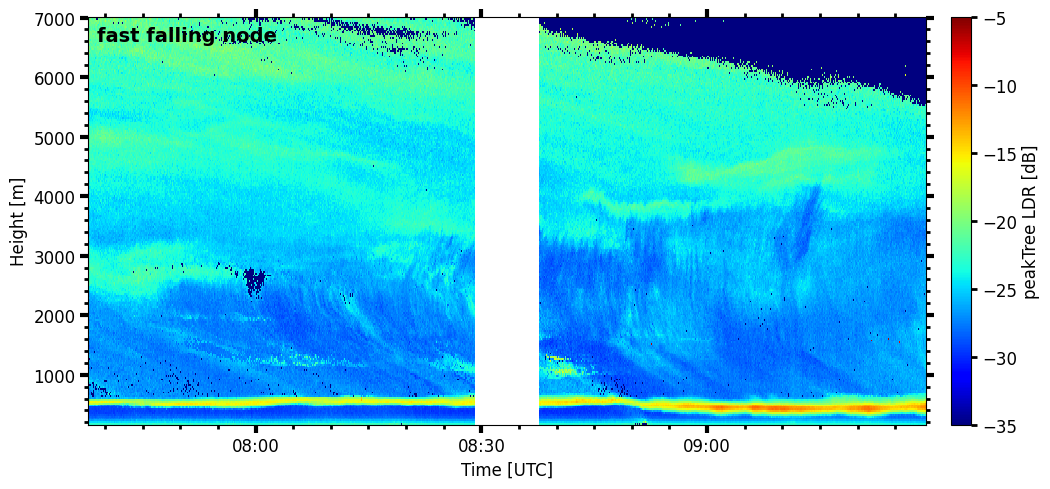

In [12]:


z_fast = pLpT.tree_to_timeheight(trees, 'z', sel_node=sel_mask)
z_fast['name'] = 'Reflectivity'
z_fast['var_unit'] = 'dBZ'
z_fast['var_lims'] = [-40, 10]
fig, ax = Transf.plot_timeheight2(z_fast, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"fast falling node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_reflectivity_fast_falling.png", dpi=250) 

v_fast = pLpT.tree_to_timeheight(trees, 'v', sel_node=sel_mask)
v_fast['name'] = 'Velocity'
v_fast['var_unit'] = 'm s$^\mathrm{-1}$'
v_fast['var_lims'] = [-2, 2]
v_fast['colormap'] = 'carbonne'
fig, ax = Transf.plot_timeheight2(v_fast, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"fast falling node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_velocity_fast_falling.png", dpi=250) 

ldr_fast = pLpT.tree_to_timeheight(trees, 'ldr', sel_node=sel_mask)
ldr_fast['name'] = 'LDR'
ldr_fast['var_unit'] = 'dB'
ldr_fast['var_lims'] = [-35, -5]
fig, ax = Transf.plot_timeheight2(ldr_fast, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"fast falling node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_ldr_fast_falling.png", dpi=250) 


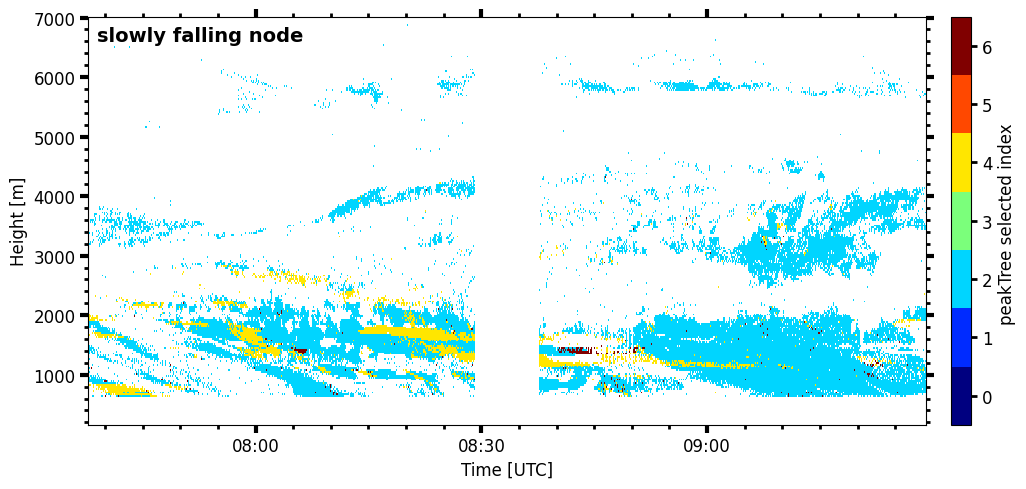

In [13]:
sel_mask = np.empty_like(no_nodes['var'])
sel_mask[:] = np.nan
# selection rule for the slowly falling ice population
sel_mask[(no_nodes['var'] > 1) & (no_nodes['var'] < 3)] = 2
sel_mask[~pLpT.tree_to_timeheight(trees, 'z', sel_node=4)['mask']] = 4
sel_mask[~pLpT.tree_to_timeheight(trees, 'z', sel_node=6)['mask']] = 6

# optional: no slowly falling ice, when the node was previously identified as liquid
sel_mask[sel_mask == index_liquid['var']] = np.nan
# also optional: fallback to node 0 below the melting layer
sel_mask[:,:np.where(no_nodes['rg'] > 600)[0][0]] = np.nan

index_slow = {**index_liquid}
index_slow['var'] = sel_mask
fig, ax = pLpT.plot_sel_index(index_slow, figsize=[11, 5])
ax.text(0.01,0.94, f"slowly falling node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_selected_slow_falling.png", dpi=250) 

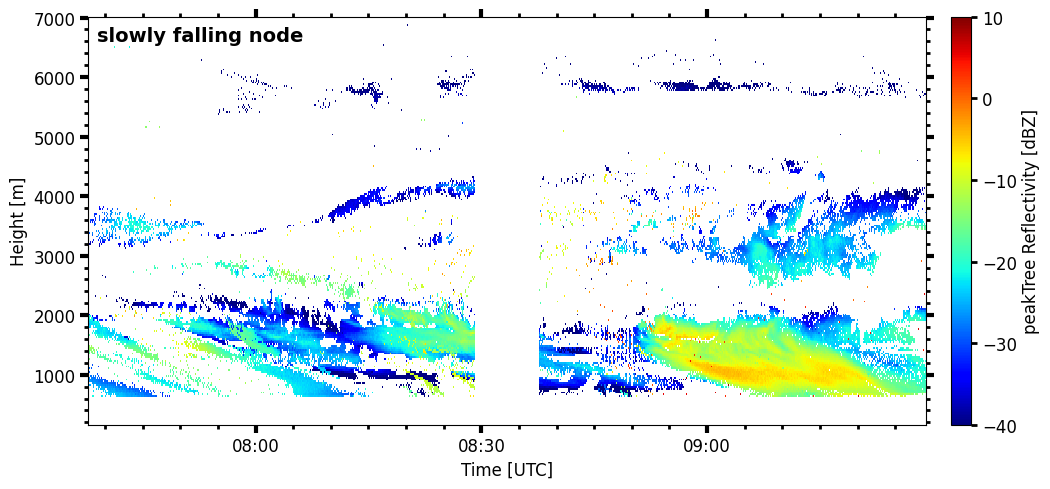

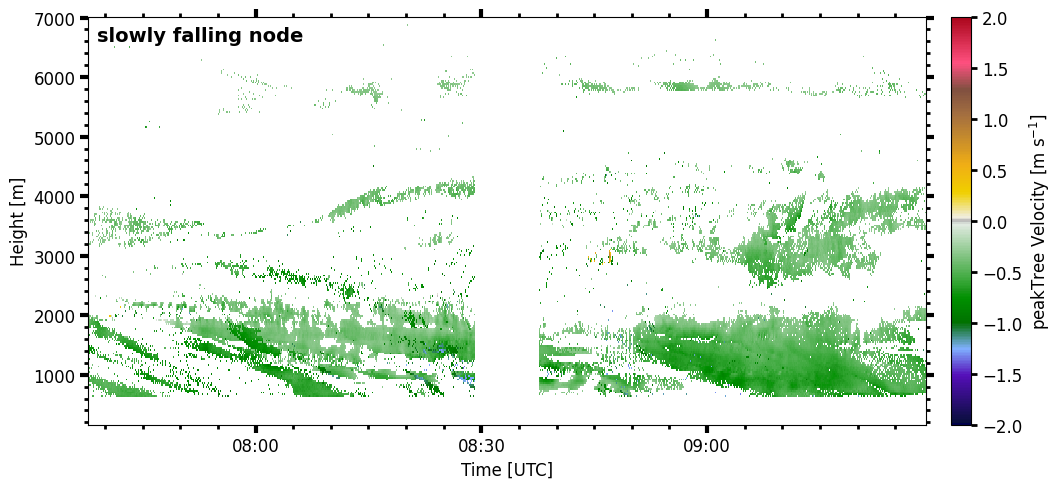

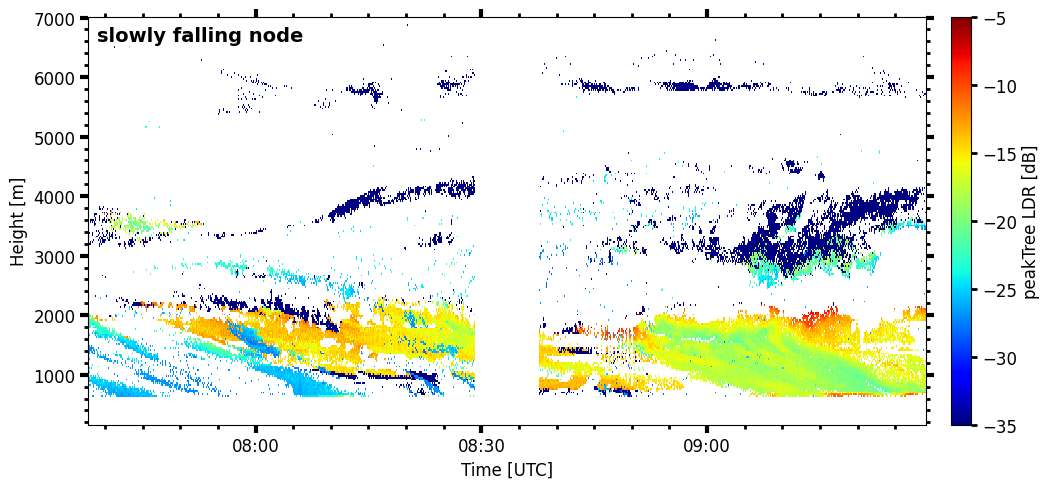

In [14]:

z_slow = pLpT.tree_to_timeheight(trees, 'z', sel_node=sel_mask)
z_slow['name'] = 'Reflectivity'
z_slow['var_unit'] = 'dBZ'
z_slow['var_lims'] = [-40, 10]
fig, ax = Transf.plot_timeheight2(z_slow, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"slowly falling node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_reflectivity_slow_falling.png", dpi=250) 

v_slow = pLpT.tree_to_timeheight(trees, 'v', sel_node=sel_mask)
v_slow['name'] = 'Velocity'
v_slow['var_unit'] = 'm s$^\mathrm{-1}$'
v_slow['var_lims'] = [-2, 2]
v_slow['colormap'] = 'carbonne'
fig, ax = Transf.plot_timeheight2(v_slow, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"slowly falling node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_velocity_slow_falling.png", dpi=250) 


ldr_slow = pLpT.tree_to_timeheight(trees, 'ldr', sel_node=sel_mask)
ldr_slow['name'] = 'LDR'
ldr_slow['var_unit'] = 'dB'
ldr_slow['var_lims'] = [-35, -5]
fig, ax = Transf.plot_timeheight2(ldr_slow, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"slowly falling node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_ldr_slow_falling.png", dpi=250) 

### Exercises

- How would you interpret the feature at 08:00 1700m / 08:07 900m
- Any thoughts on the discrimination between liquid and (small) ice?
- How would you improve the grouping of nodes to particle populations?
- Convert the RPG FMCW94 files (02_convert_file.ipynb) and have a look as well